## 코로나 확진자 정보 데이터

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [3]:
# patient_route_csv = pd.read_csv('corona_data/PatientRoute.csv')
# patient_route_df = pd.DataFrame(patient_route_csv)
# patient_route_df.head()

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534


In [2]:
## 환자 확진일, 시도, 
patient_info = pd.read_csv('exam/PatientInfo.csv')
patient_info = pd.DataFrame(patient_info)
patient_info.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [3]:
len(patient_info)

4004

In [4]:
len(patient_info[patient_info['city'].isna() == True])

78

In [5]:
a = patient_info[['confirmed_date','province','patient_id']]
a.confirmed_date = pd.to_datetime(a.confirmed_date)
a.confirmed_date = a.confirmed_date.dt.to_period('M')

C:\Users\qkreh\jupyter\envs\project\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [6]:
a.province.unique()

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [7]:
## 도 이름 한글로.
a.province = a.province.replace('Seoul','서울').replace('Seoul','서울').replace('Busan','부산').replace('Daegu','대구').replace('Gwangju','광주').replace('Incheon','인천')
a.province = a.province.replace('Daejeon','대전').replace('Ulsan','울산').replace('Sejong','세종').replace('Gyeonggi-do','경기도').replace('Gangwon-do','강원도').replace('Chungcheongbuk-do','충청북도')
a.province = a.province.replace('Chungcheongnam-do','충청남도').replace('Jeollabuk-do','전라북도').replace('Jeollanam-do','전라남도').replace('Gyeongsangbuk-do','경상북도').replace('Gyeongsangnam-do','경상남도').replace('Jeju-do','제주도')
a.province = a.province.replace('Daejeon','대전').replace('Ulsan','울산').replace('Sejong','세종').replace('Gyeonggi-do','경기도').replace('Gangwon-do','강원도')

In [8]:
df_01 = a[a['confirmed_date'] == '2020-01']
df_02 = a[a['confirmed_date'] == '2020-02']
df_03 = a[a['confirmed_date'] == '2020-03']
df_04 = a[a['confirmed_date'] == '2020-04']
df_05 = a[a['confirmed_date'] == '2020-05']
df_06 = a[a['confirmed_date'] == '2020-06']

In [9]:
## df_01 ~ df_06까지 다 실행함.
df_06 = df_06.groupby(['province']).count()
df_06.drop(['confirmed_date'], axis=1, inplace=True)
df_06.columns = ['확진자수']
df_05 = df_05.groupby(['province']).count()
df_05.drop(['confirmed_date'], axis=1, inplace=True)
df_05.columns = ['확진자수']
df_04 = df_04.groupby(['province']).count()
df_04.drop(['confirmed_date'], axis=1, inplace=True)
df_04.columns = ['확진자수']
df_03 = df_03.groupby(['province']).count()
df_03.drop(['confirmed_date'], axis=1, inplace=True)
df_03.columns = ['확진자수']
df_02 = df_02.groupby(['province']).count()
df_02.drop(['confirmed_date'], axis=1, inplace=True)
df_02.columns = ['확진자수']
df_01 = df_01.groupby(['province']).count()
df_01.drop(['confirmed_date'], axis=1, inplace=True)
df_01.columns = ['확진자수']

In [10]:
x = df_03.index.get_level_values('province')

In [11]:
from itertools import cycle, islice

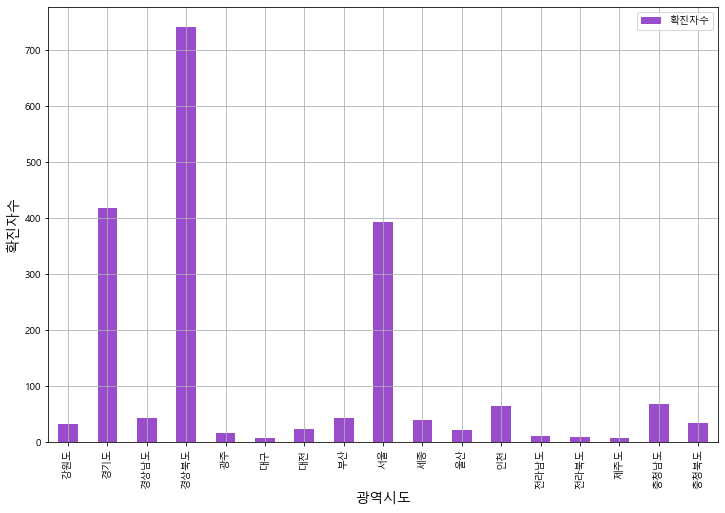

In [12]:
my_colors = [(0.6,0.3,0.8)] 
ax = df_03.plot.bar(figsize=(12,8), color = my_colors)
ax.set_xlabel('광역시도',fontsize=14)
ax.set_ylabel('확진자수', fontsize=14)
plt.title = '3월'
plt.grid()
plt.savefig('2003시도별')

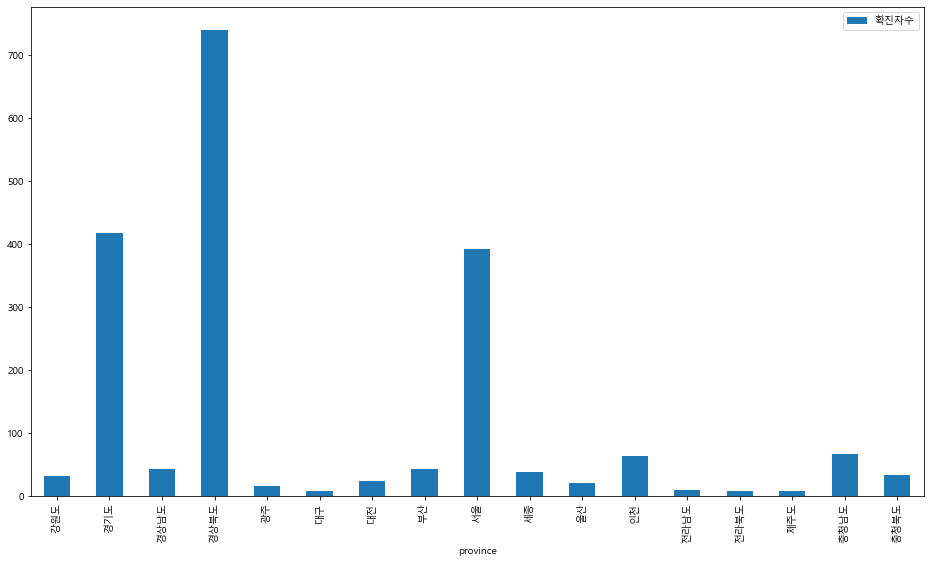

In [13]:
df_03.plot.bar(figsize=(16,9))
plt.savefig('2003_corona')

<AxesSubplot:xlabel='province'>

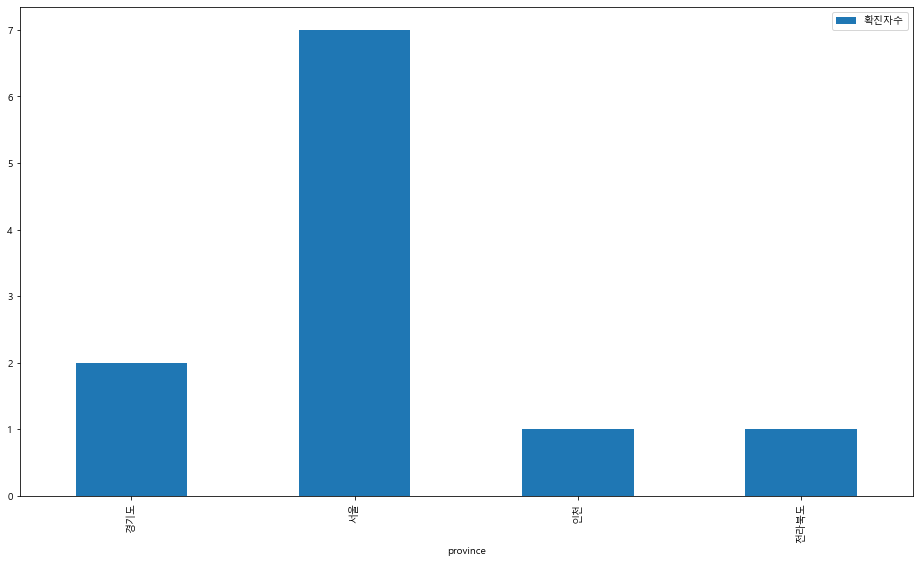

In [14]:
df_01.plot.bar(figsize=(16,9))

In [18]:
a

,confirmed_date,province,patient_id
0,2020-01,서울,1000000001
1,2020-01,서울,1000000002
2,2020-01,서울,1000000003
3,2020-01,서울,1000000004
4,2020-01,서울,1000000005
...,...,...,...
3999,2020-04,제주도,7000000010
4000,2020-04,제주도,7000000011
4001,2020-04,제주도,7000000012
4002,2020-04,제주도,7000000013
